# Importing and Tidying Data

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dateutil.relativedelta import relativedelta
from datetime import datetime
import datetime

In [2]:
# create array of dates to use for looping through Citibike's poorly named Index
relevant_datetimes = []
latest = datetime.date(2017, 12, 1)
current = datetime.date(2017, 1, 1)    

while current <= latest:
    relevant_datetimes.append(current)
    current += relativedelta(months=1)

#break up list of csvs into two for easier processing
bike_trip_df = pd.DataFrame()

#combine all trip data CSVs
for dt in relevant_datetimes:
    df = pd.read_csv('https://s3.amazonaws.com/tripdata/'+str(dt.year)+str(dt.month).zfill(2)+'-citibike-tripdata.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
    df.columns = ['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender']
    df['starttime'] = df['starttime'].apply(lambda x: x + ":00" if (x[-3]==":") & (x[-6]!=":") else x)
    df['stoptime'] = df['stoptime'].apply(lambda x: x + ":00" if (x[-3]==":") & (x[-6]!=":") else x)
    df['usertype'] = df['usertype'].apply(lambda x: 0 if x == 'Customer' else 1 if x == 'Subscriber' else x)

    if df['starttime'][0][4] == '-':
        df['starttime'] = pd.to_datetime(df['starttime'], format = '%Y-%m-%d %H:%M:%S')
        df['stoptime'] = pd.to_datetime(df['stoptime'], format = '%Y-%m-%d %H:%M:%S')
    else:
        df['starttime'] = pd.to_datetime(df['starttime'], format = '%m/%d/%Y %H:%M:%S')
        df['stoptime'] = pd.to_datetime(df['stoptime'], format = '%m/%d/%Y %H:%M:%S')
    bike_trip_df = bike_trip_df.append(df)

In [3]:
print(bike_trip_df.info())
print(bike_trip_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16364657 entries, 0 to 889966
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   float64
birth year                 float64
gender                     int64
dtypes: datetime64[ns](2), float64(6), int64(5), object(2)
memory usage: 2.0+ GB
None
       tripduration  start station id  start station latitude  \
count  1.636466e+07      1.636466e+07            1.636466e+07   
mean   9.945862e+02      1.357132e+03            4.073663e+01   
std    1.617892e+04      1.346904e+03            7.262269e-02   
min    6.10000

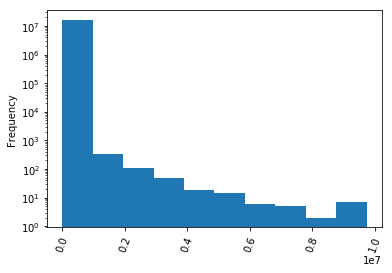

In [4]:
bike_trip_df['tripduration'].plot(kind='hist', rot=70, logy=True)
plt.show()
# bike_trip_df['tripduration'].sort_values()
# station_availability_df = station_availability_df[station_availability_df.avail_bikes <= 100]
# station_availability_df['avail_bikes'].plot(kind='hist', rot=70, logy=True)
# plt.show()

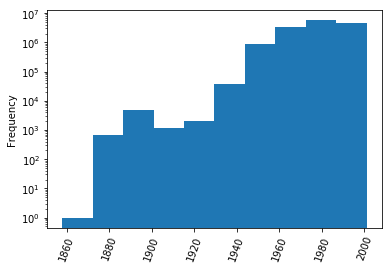

In [5]:
bike_trip_df['birth year'].plot(kind='hist', rot=70, logy=True)
plt.show()

#choose 1930 as cutoff
bike_trip_df.loc[bike_trip_df['birth year'] < 1930,'birth year'] = np.nan

In [6]:
bike_trip_df = bike_trip_df[bike_trip_df.stoptime < '2018-01-01']

In [7]:
bike_trip_df.to_csv('bike_trip_df')